In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os


# [IAPR][iapr]: Project


**Group ID:** 15

**Author 1 (sciper):** Tom Mery (297217)  
**Author 2 (sciper):** Gabriel Margaria (299895)   
**Author 3 (sciper):** Théo Hermann (282844)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [2]:
## load images
import os 
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt


In [3]:

def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [4]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

data_project\train_solution_06


In [5]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


solving  6
data_project\train_solution_00
solving  10
data_project\train_solution_00


## Step by Step Testing

### Thresholding

In [30]:
import numpy as np
import cv2
import skimage.filters as filters
import skimage.color as color
#import skimage.segmentation as seg
import skimage.morphology as morph


def preprocessing(img, debug=False):
    # Convert the image to grayscale
    r,g,b = cv2.split(img)
    
    # Get the hue channel :
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)

    # Plot the histogram of the r g b channels :
    
    plt.hist(r.ravel(), bins=256, range=(0, 256))
    plt.show()
    plt.hist(g.ravel(), bins=256, range=(0, 256))
    plt.show()
    plt.hist(b.ravel(), bins=256, range=(0, 256))
    plt.show()
    plt.hist(h.ravel(), bins=256, range=(0, 256))
    plt.show()

    


    gray_image = color.rgb2gray(img)
    
    # Apply a Gaussian blur to reduce noise
    blurred_image = filters.gaussian(gray_image, sigma=1.0)
    
    # Compute the Otsu threshold
    threshold_value = filters.threshold_otsu(gray_image)

    # Segment the image using the threshold
    binary_image = gray_image > threshold_value
    
    # Fill small holes and remove small objects
    cleaned_image = morph.remove_small_holes(morph.remove_small_objects(binary_image, min_size=5000))
    
    # Return the preprocessed image
    preproc_img = cleaned_image.astype(np.uint8) * 255

    if debug:
        return blurred_image, binary_image, cleaned_image, preproc_img
    else:
        return preproc_img

In [22]:
import numpy as np
import cv2
import skimage.filters as filters
import skimage.color as color
#import skimage.segmentation as seg
import skimage.morphology as morph


def preprocessing_gab(img, debug=False):
    # Convert the image to grayscale
    r,g,b = cv2.split(img)
    
    # Get the hue channel :
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)

    # Plot the histogram of the r g b channels :
    
    plt.hist(r.ravel(), bins=256, range=(0, 256))
    plt.show()
    plt.hist(g.ravel(), bins=256, range=(0, 256))
    plt.show()
    plt.hist(b.ravel(), bins=256, range=(0, 256))
    plt.show()
    plt.hist(h.ravel(), bins=256, range=(0, 256))
    plt.show()


    # Isolate pixels not in the range 100-120
    mask = cv2.inRange(h, 95, 130)

    # Opening to remove small elements

    kernel = np.ones((30,30),np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Remove small holes

    kernel = np.ones((10,10),np.uint8)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    
    

    # Plot the result
    plt.imshow(mask, cmap='gray')
    plt.show()

    plt.imshow(opening, cmap='gray')
    plt.show()

    plt.imshow(closing, cmap='gray')
    plt.show()

    
    
    gray_image = color.rgb2gray(img)
    
    # Apply a Gaussian blur to reduce noise
    blurred_image = filters.gaussian(gray_image, sigma=1.0)
    
    # Compute the Otsu threshold
    threshold_value = filters.threshold_otsu(gray_image)

    # Segment the image using the threshold
    binary_image = gray_image > threshold_value
    
    # Fill small holes and remove small objects
    cleaned_image = morph.remove_small_holes(morph.remove_small_objects(binary_image, min_size=5000))
    
    # Return the preprocessed image
    preproc_img = cleaned_image.astype(np.uint8) * 255

    if debug:
        return blurred_image, binary_image, cleaned_image, preproc_img
    else:
        return preproc_img

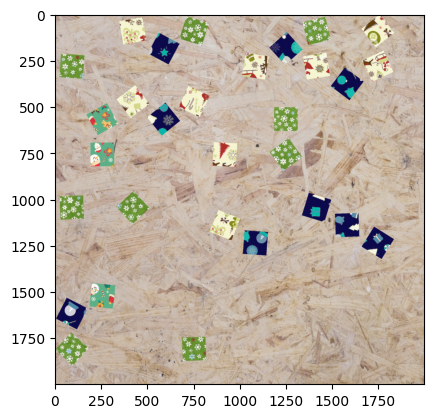

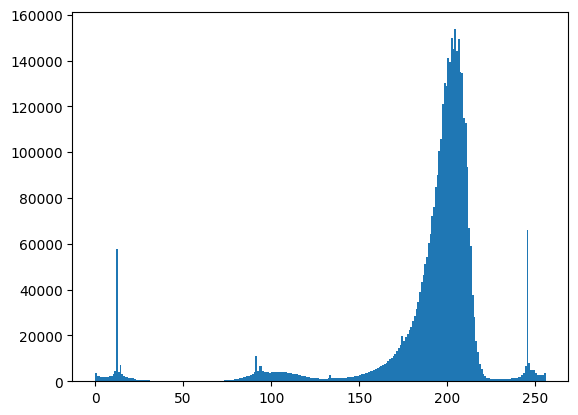

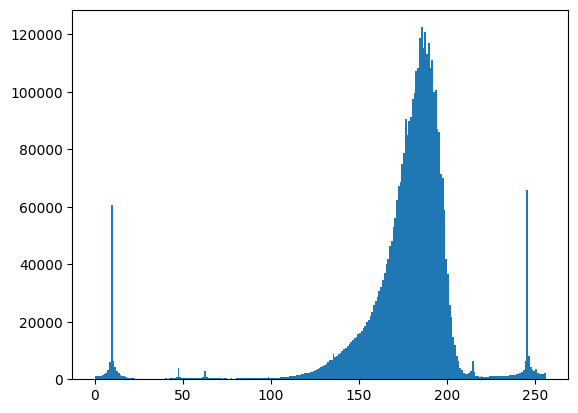

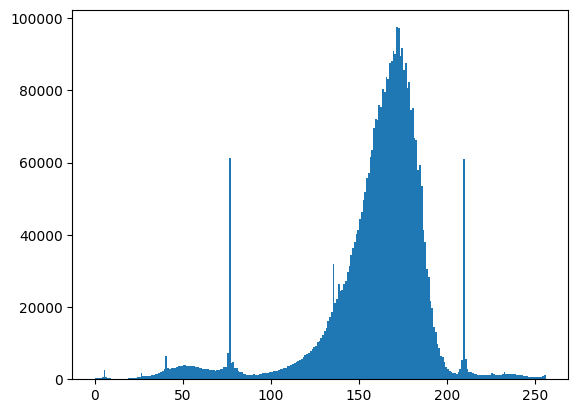

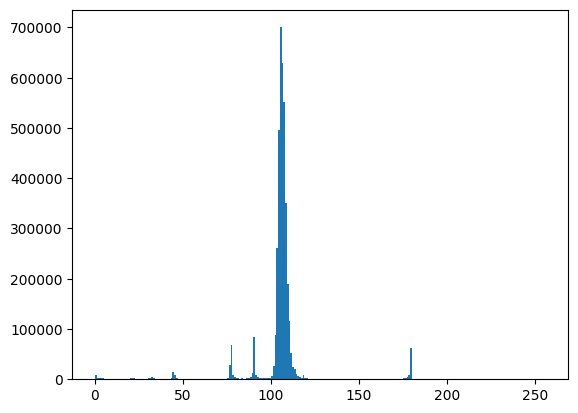

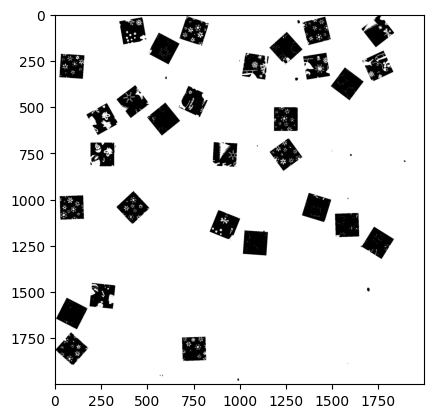

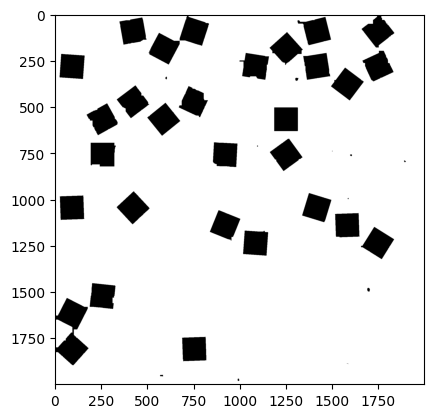

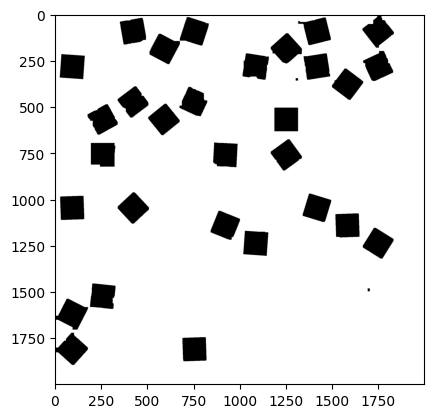

In [23]:
#Test Cell
img = load_input_image(6 , folder = "train" , path = "data_project")
plt.imshow(img)
plt.show()
#debug flag to view the intermediary result images
blur, thresh, bin, preproc_img=preprocessing_gab(img, debug=True)


#preproc_img=preprocessing(img)
#plt.imshow(preproc_img)

### Contour Detection

In [20]:
import cv2
def monitor_contours(img, contours):
    """
    Purpose of this function is just to draw the contour we found in order to monitor the 
    Segmentation process. Will not be used in the end.
    """
    if len(contours) > 0:
        # Draw the contours on the original image
        contour_image = np.zeros_like(img)
        cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

        
        contour_image = cv2.cvtColor(contour_image, cv2.COLOR_BGR2GRAY)
        # Plot the original image with the contours overlaid
        fig, ax = plt.subplots()
        ax.imshow(img, cmap='gray')
        ax.contour(contour_image, colors='r')
        ax.axis('off')
        plt.show()
    else:
        print("No contours found.")

C:\Users\gabma\AppData\Local\Temp\ipykernel_17024\1557719108.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(contours).shape)


(82,)


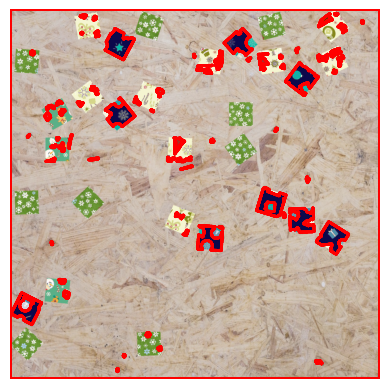

(0,)


NameError: name 'piece_image' is not defined

In [21]:

import skimage.measure as measure

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(preproc_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(np.array(contours).shape)
monitor_contours(img, contours)

# Iterate over the contours
list_pieces=[]
for contour in contours:
    # Check that the contour is closed (i.e., the first and last points are the same)
    if not np.allclose(contour[0], contour[-1]):
        continue
    
    # Check that the contour has the correct number of points
    if len(contour) < 100:
        continue
    
    # Convert the contour coordinates to integers
    contour = np.round(contour).astype(int)
    
    # Check that the contour is square-shaped with the correct size
    x, y, width, height = cv2.boundingRect(contour)
    if abs(width - height) > 5 or width < 120 or width > 130:
        continue
    
    # Crop the corresponding region of the original image to extract the puzzle piece
    piece_image = img[y:y+height, x:x+width]
    list_pieces.append(piece_image)

print(np.array(list_pieces).shape)

plt.imshow(piece_image)
plt.title("visualizing a piece from the puzzle")

### Feature Extraction

Compute the Fourier descriptors of each contour and use them as a compact representation of the shape of the piece. Then, compare the Fourier descriptors of each piece to a pre-defined set of descriptors for each type of puzzle piece (e.g., 3x3, 3x4, 4x4) to classify it. Alternatively, you could use the Fourier descriptors to match each piece to its corresponding location in a pre-defined puzzle template

In [54]:
from scipy.fft import fft, ifft

def get_invariant_features(img, contours, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    """
    This function extracts a rotation, translation, and scale invariant 2D feature vector
    using the Fourier descriptors of a contour.

    Parameters:
        contour (array)

    Returns:
        feature_vector (array): The invariant 2D feature vector computed from the Fourier descriptors.
    """
    
    num_interp=100
    cont = contours[0]
    x = cont[:,0,0]
    y = cont[:,0,1]
    t = np.arange(len(x))
    t_int = np.linspace(0,len(x)-1,num_interp)
    x_int = np.interp(t_int,t,x)
    x_int = x_int.astype(np.int32)
    y_int = np.interp(t_int,t,y)
    y_int = y_int.astype(np.int32)
    contour_complex = []
    descriptors = []
    for i in range(len(x_int)):
        contour_complex.append(complex(x_int[i],y_int[i]))
    contour=contour_complex

    if inv_to_translation:
        # Subtract the mean of the contour to make it invariant to translation
        mean_contour = np.mean(contour)
        centered_contour = contour - mean_contour
        contour=centered_contour

    # Compute the Fourier descriptors of the centered contour
    descriptors = fft(contour)

    # Select only the positive frequency components
    n = descriptors.shape[0]
    pos_coeffs = descriptors[:n//2]

    # Compute the magnitude of the Fourier coefficients
    mag_coeffs = np.abs(pos_coeffs)

    if inv_to_scale:
        # Normalize the magnitude of the Fourier coefficients to make them invariant to scale
        normalized_coeffs = pos_coeffs / mag_coeffs[0]
        pos_coeffs=normalized_coeffs
        mag_coeffs=np.abs(normalized_coeffs)

    # Compute the phase angle of the Fourier coefficients to make them invariant to rotation
    phase_coeffs = np.angle(pos_coeffs)

    if inv_to_rotation:
        feature1=mag_coeffs[1]
        feature2=mag_coeffs[2]
    else:
        feature1=np.real(pos_coeffs[0])
        feature2=np.real(pos_coeffs[1])

    return [feature1, feature2]

In [69]:
#Compute fourier descriptors of ground-truth pieces for each given shape

#Get the fourier descriptors of each piece
print(np.array(contours).shape)
features=get_invariant_features(img, contours)
print(np.array(features).shape)

#Compute and compare the descriptor with predifed descriptors

(86,)
(2,)


c:\Users\theoh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


### Clustering

In [70]:
from sklearn.cluster import KMeans

def cluster_puzzle_pieces(features, k=4):
    # Perform k-means clustering on the features
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    
    # Get the cluster labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Identify the outliers as the points furthest away from the centroid of their cluster
    distances = [np.linalg.norm(features[i]-centroids[labels[i]]) for i in range(len(features))]
    outliers = np.argsort(distances)[-k:]
    
    # Identify which puzzle each piece belongs to based on its cluster label
    puzzle_ids = [np.argmax(np.bincount(labels[i*128:(i+1)*128])) for i in range(len(features)//128)]
    
    return labels, centroids, outliers, puzzle_ids

In [71]:

features=[features, features, features, features]#temporary fix cause only one feature for the moment
#print(np.array(features).shape)

#need to adaptively test for k=2, 3, ... (should we take into account outlier cluster ?)
labels, centroids, outliers, puzzle_ids = cluster_puzzle_pieces(features, k=4)

(4, 2)


c:\Users\theoh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """


### Solve Tiling

## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
